# How old is the average Men's Javelin Thrower?

### Purpose: Perform EDA on the top 500 Men's Javelin Throwers in the World as of May 9th 2023 in order to extract meaningful descriptive statistics and visualizations of the distribution of ages among these athletes

In [85]:
# Import Dependencies
import requests
from bs4 import BeautifulSoup as soup
from splinter import Browser
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.interpolate import make_interp_spline

In [25]:
# Set up Splinter
browser = Browser('chrome')

In [26]:
url = 'https://worldathletics.org/world-rankings/javelin-throw/men?regionType=world&page=1&rankDate=2023-05-09&limitByCountry=0'
browser.visit(url)

In [4]:
pages = []
for i in range(1,6):
    tables = pd.read_html(f'https://worldathletics.org/world-rankings/javelin-throw/men?regionType=world&page={i}&rankDate=2023-05-09&limitByCountry=0')
    pages.append(tables)

frame = pd.DataFrame()
for page in pages:
    frame = pd.concat([frame,page[0]],axis=0)

In [5]:
frame

,Place,Competitor,DOB,Nat,Score,Event List
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw
3,4,Julian WEBER,29 AUG 1994,GER,1385,Javelin Throw
4,5,Arshad NADEEM,02 JAN 1997,PAK,1306,Javelin Throw
...,...,...,...,...,...,...
95,496,Tomonori MORISAWA,14 DEC 2005,JPN,826,Javelin Throw
96,497,Thibaud DUTREY,13 FEB 2000,FRA,826,Javelin Throw
97,498,Kazuhisa MATSUSHIMA,27 FEB 2001,JPN,826,Javelin Throw
98,499,Shota KOMATSU,11 OCT 2002,JPN,826,Javelin Throw


In [6]:
frame.dtypes

Place          int64
Competitor    object
DOB           object
Nat           object
Score          int64
Event List    object
dtype: object

### Calculate age with datetime and DOB variable

In [8]:
# Copy dataframe
df = frame.copy()

In [9]:
# Inspect df for confirmation
df

,Place,Competitor,DOB,Nat,Score,Event List
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw
3,4,Julian WEBER,29 AUG 1994,GER,1385,Javelin Throw
4,5,Arshad NADEEM,02 JAN 1997,PAK,1306,Javelin Throw
...,...,...,...,...,...,...
95,496,Tomonori MORISAWA,14 DEC 2005,JPN,826,Javelin Throw
96,497,Thibaud DUTREY,13 FEB 2000,FRA,826,Javelin Throw
97,498,Kazuhisa MATSUSHIMA,27 FEB 2001,JPN,826,Javelin Throw
98,499,Shota KOMATSU,11 OCT 2002,JPN,826,Javelin Throw


In [7]:
# Inspect DOB in isolation
frame.DOB

0     21 OCT 1997
1     24 DEC 1997
2     10 OCT 1990
3     29 AUG 1994
4     02 JAN 1997
         ...     
95    14 DEC 2005
96    13 FEB 2000
97    27 FEB 2001
98    11 OCT 2002
99    06 JAN 2004
Name: DOB, Length: 500, dtype: object

In [13]:
# Define function to calculate current age
def calculate_age(dob):
    """
    Calculates the age based on the date of birth.
    """
    try:
        dob_date = datetime.strptime(str(dob), '%d %b %Y')
        today_date = datetime.today()
        age = today_date.year - dob_date.year - ((today_date.month, today_date.day) < (dob_date.month, dob_date.day))
        return age
    except:
        return np.nan

In [15]:
# Add a new column with the age calculated for each row
df['Age'] = df['DOB'].apply(calculate_age)
df['Age'] = df['Age'].fillna(0)

In [16]:
df

,Place,Competitor,DOB,Nat,Score,Event List,Age
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw,25.0
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw,25.0
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw,32.0
3,4,Julian WEBER,29 AUG 1994,GER,1385,Javelin Throw,28.0
4,5,Arshad NADEEM,02 JAN 1997,PAK,1306,Javelin Throw,26.0
...,...,...,...,...,...,...,...
95,496,Tomonori MORISAWA,14 DEC 2005,JPN,826,Javelin Throw,17.0
96,497,Thibaud DUTREY,13 FEB 2000,FRA,826,Javelin Throw,23.0
97,498,Kazuhisa MATSUSHIMA,27 FEB 2001,JPN,826,Javelin Throw,22.0
98,499,Shota KOMATSU,11 OCT 2002,JPN,826,Javelin Throw,20.0


## Analyze age data

<AxesSubplot:ylabel='Frequency'>

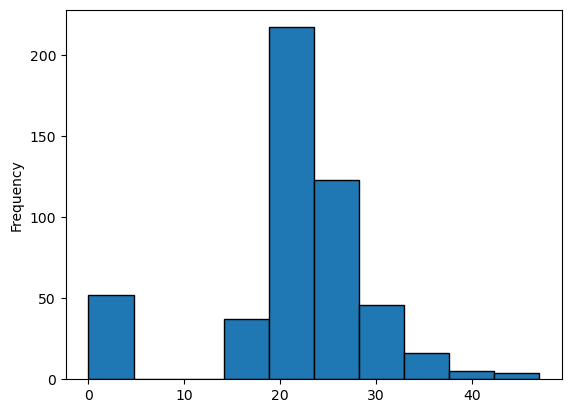

In [27]:
df.Age.plot.hist(edgecolor='black')

In [21]:
# Filter out Junior Throwers 
adult_df = df[df.Age >= 18]
adult_df.shape

(443, 7)

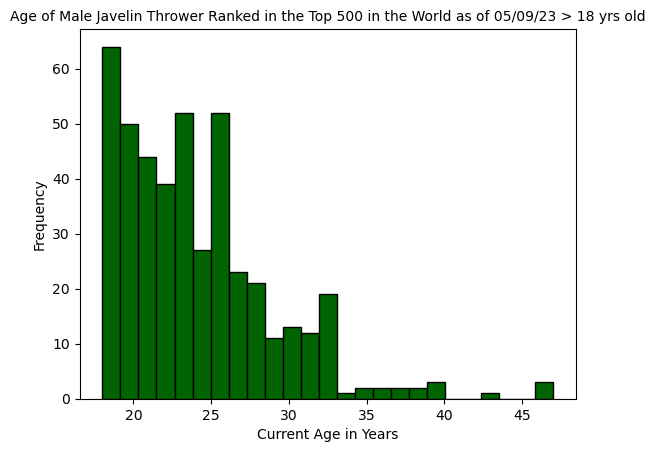

In [32]:
adult_df.Age.plot.hist(bins=25, color='darkgreen', edgecolor='black')
plt.title("Age of Male Javelin Thrower Ranked in the Top 500 in the World as of 05/09/23 > 18 yrs old", size = 10)
plt.xlabel("Current Age in Years")
plt.show()

In [38]:
adult_df.Age.describe()

count    443.000000
mean      24.099323
std        4.926066
min       18.000000
25%       20.000000
50%       23.000000
75%       27.000000
max       47.000000
Name: Age, dtype: float64

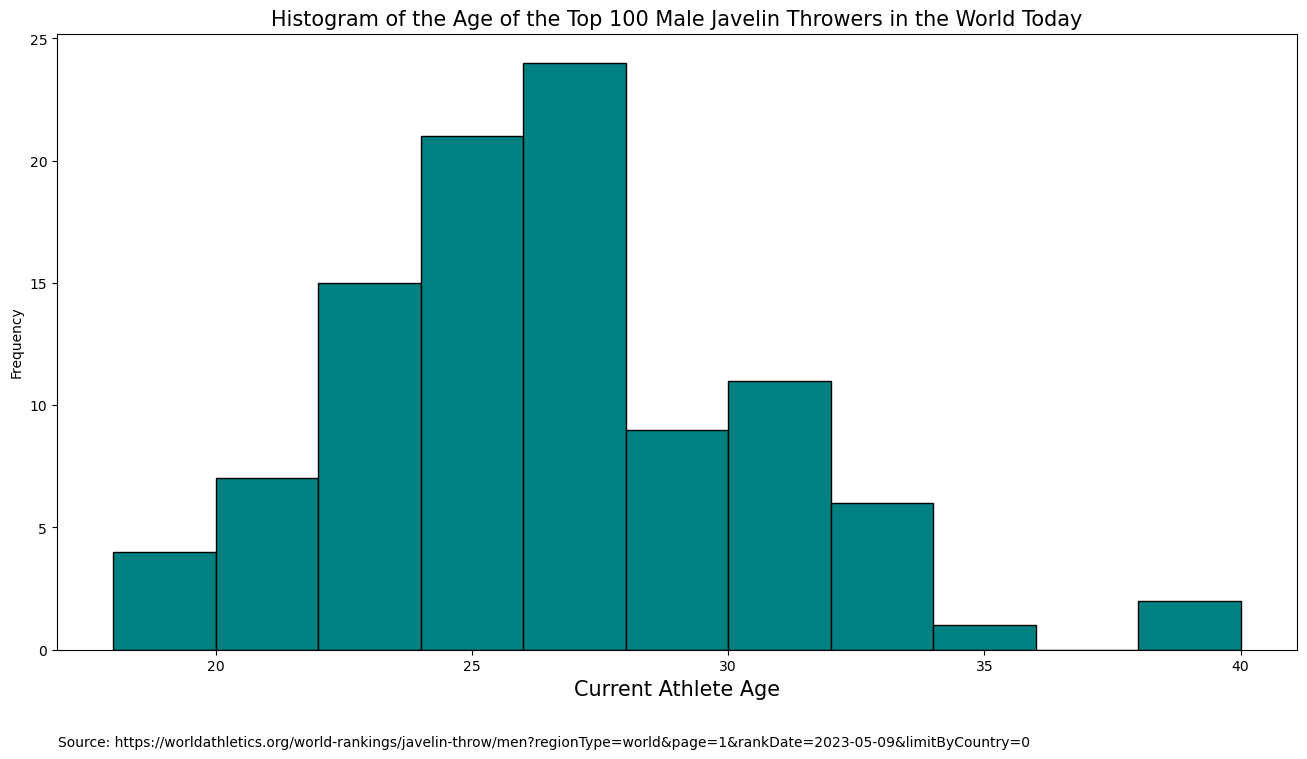

In [87]:
top_hundred =  adult_df[adult_df.Place <= 100]
top_hundred.Age.plot.hist(bins=11, color='teal', edgecolor='black', figsize=[16,8])
plt.title("Histogram of the Age of the Top 100 Male Javelin Throwers in the World Today", size=15)
plt.xlabel("Current Athlete Age", size=15)
plt.ylabel("Frequency")
plt.annotate("Source: https://worldathletics.org/world-rankings/javelin-throw/men?regionType=world&page=1&rankDate=2023-05-09&limitByCountry=0",
            xy = (.785, -0.15),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
plt.savefig("top_100_age_histogram.png")
plt.show()

In [88]:
top_hundred.Age.describe()

count    100.000000
mean      26.090000
std        4.062877
min       18.000000
25%       23.000000
50%       26.000000
75%       28.000000
max       40.000000
Name: Age, dtype: float64

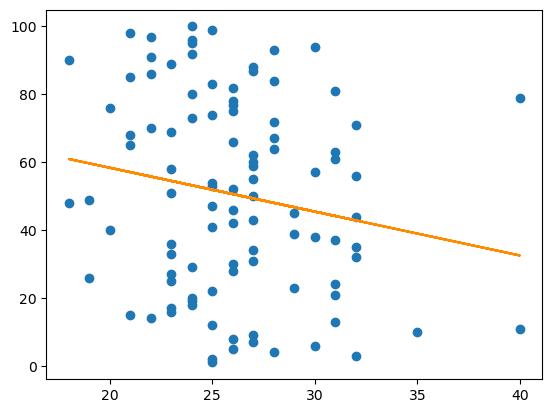

In [89]:
# Linear Regression for top_hundred
a, b = np.polyfit(top_hundred.Age, top_hundred.Place, 1)
plt.scatter(x=top_hundred.Age, y=top_hundred.Place)
plt.plot(top_hundred.Age, a*top_hundred.Age+b, color = 'darkorange')
plt.show()

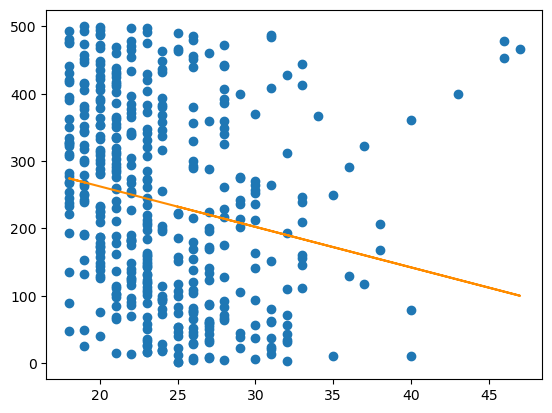

In [70]:
# Linear Regression for adult_df
a, b = np.polyfit(adult_df.Age, adult_df.Place, 1)
plt.scatter(x=adult_df.Age, y=adult_df.Place)
plt.plot(adult_df.Age, a*adult_df.Age+b, color = 'darkorange')
plt.show()

In [86]:
res = sts.linregress(adult_df.Age, adult_df.Place)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.041883


In [80]:
# Remove missing values
adult_df = adult_df.dropna()

# Reset index
adult_df = adult_df.reset_index(drop=True)

# Assign variable to x and y
x = adult_df.Age
y = adult_df.Place

# Remove duplicates
unique_x, unique_idx = np.unique(x, return_index=True)
x = unique_x
y = y[unique_idx]

# Define custom index
idx = ['point_{}'.format(i) for i in range(len(x))]

# Convert the lists to pandas Series with custom index 'idx'
x = pd.Series(x, index=idx)
y = pd.Series(y, index=idx)

# Sort the Series by index
x_sorted = x.sort_index()
y_sorted = y.sort_index()

print(np.isnan(y_sorted).any())  # Check for NaN values
print(np.isinf(y_sorted).any())  # Check for Inf values

True
False


In [84]:
# If either is 'True' remove the corresponding elements from the 'unique_x' and 'y_sorted' using boolean indexing
mask = ~(np.isnan(y_sorted) | np.isinf(y_sorted))
unique_x = unique_x[mask]
y_sorted = y_sorted[mask]

### It seems that the array unique_x is empty, which causes an IndexError when trying to access its first element. This is most likely because all values in the Age column of the adult_df dataframe were duplicates and were removed by the unique() function. You may want to check if this is the case and consider using a different dataset if you want to explore the relationship between age and place.

In [83]:
# Fit a curve to the data
spline = make_interp_spline(unique_x, y_sorted)
x_smooth = np.linspace(x_sorted.min(), x_sorted.max(), 100)
y_smooth = spline(x_smooth)

# Plot the scatter plot and the smooth curve
plt.scatter(x, y)
plt.plot(x_smooth, y_smooth)

# Show the plot
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [68]:
top_hundred.Age.describe()

count    100.000000
mean      26.090000
std        4.062877
min       18.000000
25%       23.000000
50%       26.000000
75%       28.000000
max       40.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

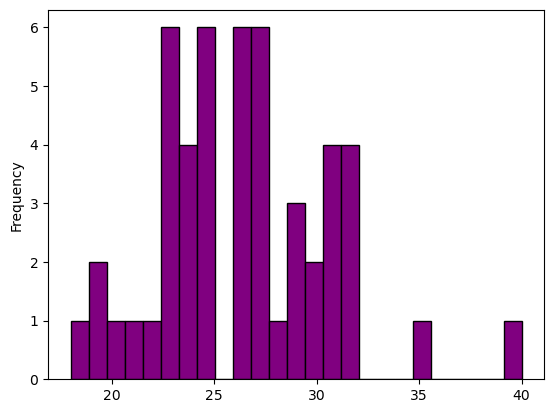

In [36]:
top_fifty = adult_df[adult_df.Place <= 50]
top_fifty.Age.plot.hist(bins=25, color='purple', edgecolor='black')

In [37]:
top_fifty.Age.describe()

count    50.000000
mean     26.460000
std       4.272408
min      18.000000
25%      24.000000
50%      26.000000
75%      29.000000
max      40.000000
Name: Age, dtype: float64

In [69]:
top_ten = adult_df[adult_df.Place <= 10]
top_ten.Age.describe()

count    10.00000
mean     28.10000
std       3.28126
min      25.00000
25%      26.00000
50%      27.00000
75%      29.50000
max      35.00000
Name: Age, dtype: float64

## Parse html for seasons bests

In [18]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# Define the base URL and parameters for the rankings page
base_url = 'https://worldathletics.org'
params = {
    'regionType': 'world',
    'page': 1,
    'rankDate': '2023-05-09',
    'limitByCountry': 0,
    'eventId': '4f558bc9-9b95-4b5a-b80a-4d0f381bffb2',  # Javelin throw event ID
}

# Send a GET request to the rankings page and parse the response with BeautifulSoup
response = requests.get(base_url + '/world-rankings/javelin-throw/men', params=params)
soup = soup(response.content, 'html.parser')
soup

[]

In [ ]:
### Note: website was not scraped successfully. print(soup) yielded empty list.

In [17]:
# Find the table of athletes and loop through each row to extract the athlete's profile link
athlete_links = []
table = soup.find('table', {'class': 'table-athletes'})
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if cells:
        link = cells[1].find('a')['href']
        athlete_links.append(link)

# Loop through each athlete's profile page and extract their season's best throw
season_bests = []
for link in athlete_links:
    response = requests.get(base_url + link)
    soup = BeautifulSoup(response.content, 'html.parser')
    results_table = soup.find('table', {'class': 'table-res'})
    season_bests.append(results_table.find_all('td', {'class': 'seasonBest'})[0].text)

# Create a pandas DataFrame with the athlete's name and season's best throw
df = pd.DataFrame({'Name': [link.split('/')[-1] for link in athlete_links], 'Season Best': season_bests})

AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
df